# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [8]:
## 超參數設定
from keras.optimizers import SGD,RMSprop,Adagrad,Adam
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 10
BATCH_SIZE = 256
MOMENTUM = 0.95
opt = [SGD,RMSprop,Adagrad,Adam]

Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [===========

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 2s 43us/step - loss: 2.3194 - accuracy: 0.1163 - val_loss: 2.3037 - val_accuracy: 0.1332
Epoch 2/10
50000/50000 [==============================] - 2s 41us/step - loss: 2.2976 - accuracy: 0.1382 - val_loss: 2.2868 - val_accuracy: 0.1529
Epoch 3/10
50000/50000 [==============================] - 2s 40us/step - loss: 2.2832 - accuracy: 0.1516 - val_loss: 2.2749 - val_accuracy: 0.1617
Epoch 4/10
50000/50000 [==============================] - 2s 41us/step - loss: 2.2721 - accuracy: 0.1612 - val_loss: 2.2650 - val_accuracy: 0.1690
Epoch 5/10
50000/50000 [==============================] - 2s 40us/step - loss: 2.2626 - accuracy: 0.1710 - val_loss: 2.2562 - val_accuracy: 0.1780
Epoch 6/10
50000/50000 [==============================] - 2s 41us/step - loss: 2.2539 - accuracy: 0.1790 - val_loss: 2.2480 - val_accuracy: 0.1870
Epoch 7/10
50000/50000 [==============================] - 2s 40us/st

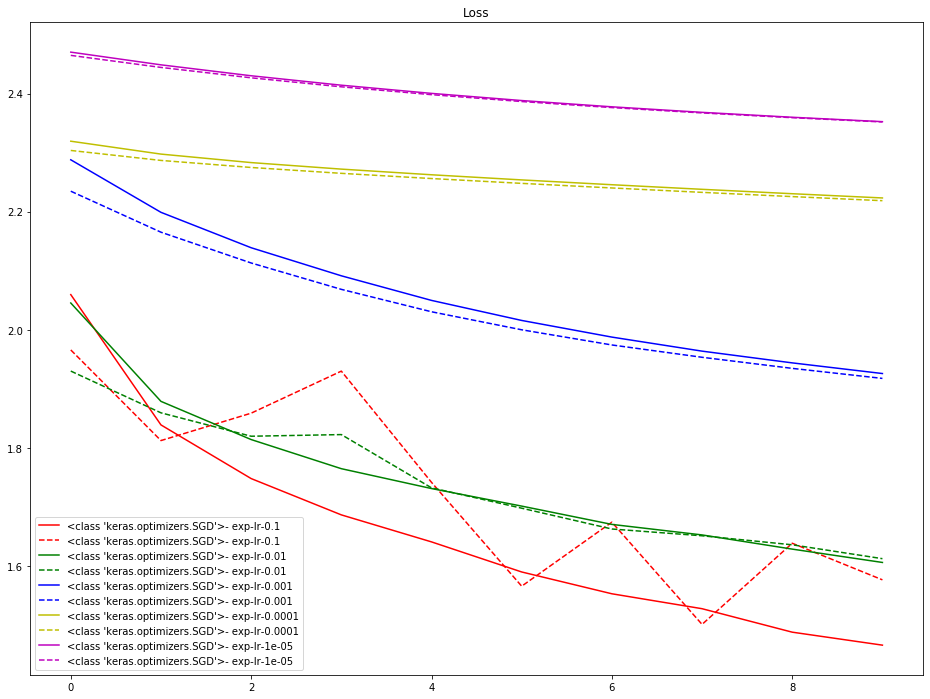

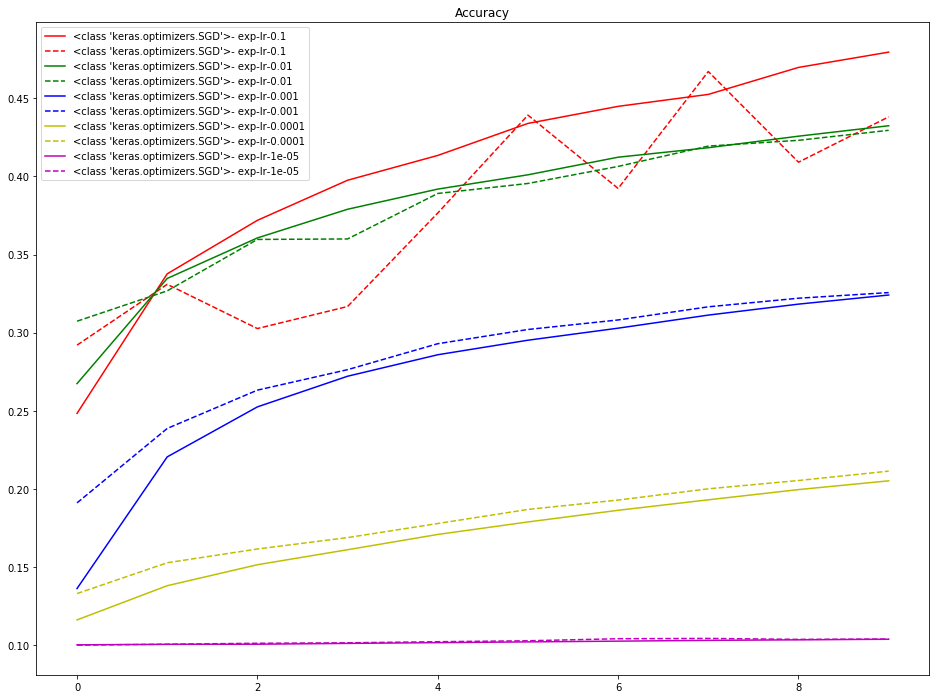

Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [===========

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 2s 48us/step - loss: 1.9546 - accuracy: 0.3004 - val_loss: 1.9080 - val_accuracy: 0.3203
Epoch 2/10
50000/50000 [==============================] - 2s 46us/step - loss: 1.7817 - accuracy: 0.3661 - val_loss: 1.7394 - val_accuracy: 0.3754
Epoch 3/10
50000/50000 [==============================] - 2s 46us/step - loss: 1.7063 - accuracy: 0.3945 - val_loss: 1.9114 - val_accuracy: 0.3265
Epoch 4/10
50000/50000 [==============================] - 2s 47us/step - loss: 1.6485 - accuracy: 0.4162 - val_loss: 1.6674 - val_accuracy: 0.4182
Epoch 5/10
50000/50000 [==============================] - 2s 47us/step - loss: 1.6100 - accuracy: 0.4324 - val_loss: 1.6126 - val_accuracy: 0.4329
Epoch 6/10
50000/50000 [==============================] - 2s 46us/step - loss: 1.5711 - accuracy: 0.4457 - val_loss: 1.5789 - val_accuracy: 0.4336
Epoch 7/10
50000/50000 [==============================] - 2s 48us/st

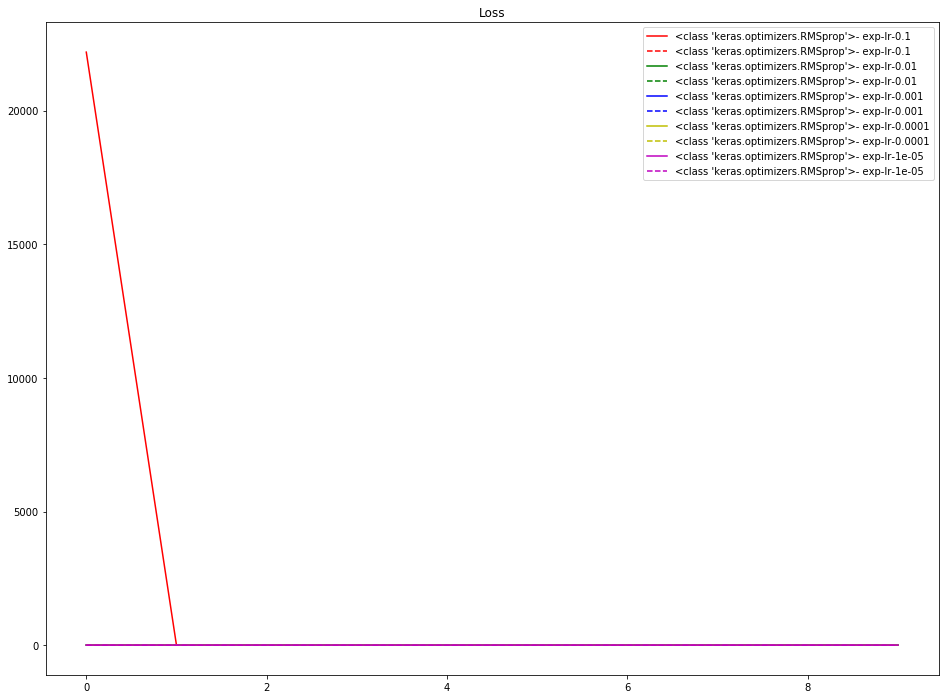

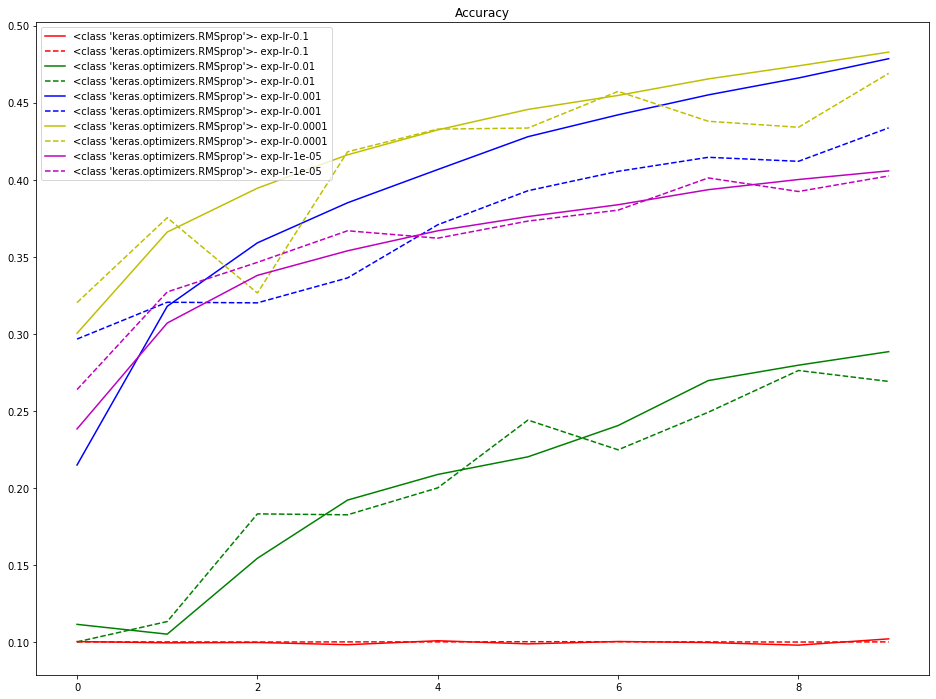

Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [===========

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 2s 46us/step - loss: 2.0456 - accuracy: 0.2788 - val_loss: 1.9552 - val_accuracy: 0.3167
Epoch 2/10
50000/50000 [==============================] - 2s 45us/step - loss: 1.9201 - accuracy: 0.3309 - val_loss: 1.8990 - val_accuracy: 0.3308
Epoch 3/10
50000/50000 [==============================] - 2s 45us/step - loss: 1.8787 - accuracy: 0.3474 - val_loss: 1.8702 - val_accuracy: 0.3504
Epoch 4/10
50000/50000 [==============================] - 2s 45us/step - loss: 1.8529 - accuracy: 0.3569 - val_loss: 1.8460 - val_accuracy: 0.3530
Epoch 5/10
50000/50000 [==============================] - 2s 46us/step - loss: 1.8330 - accuracy: 0.3625 - val_loss: 1.8304 - val_accuracy: 0.3599
Epoch 6/10
50000/50000 [==============================] - 2s 45us/step - loss: 1.8180 - accuracy: 0.3707 - val_loss: 1.8152 - val_accuracy: 0.3636
Epoch 7/10
50000/50000 [==============================] - 2s 46us/st

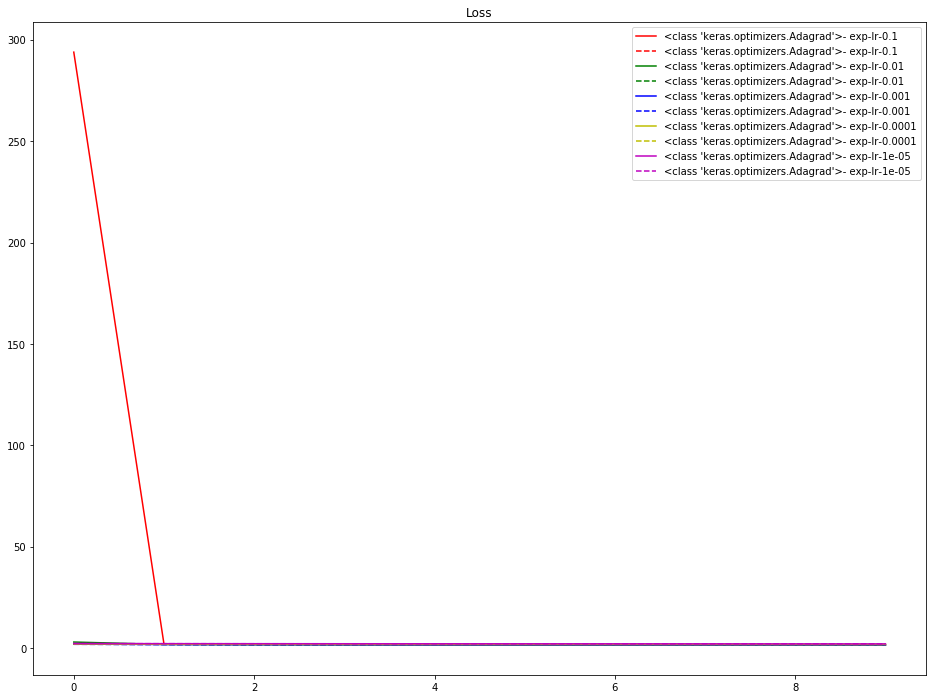

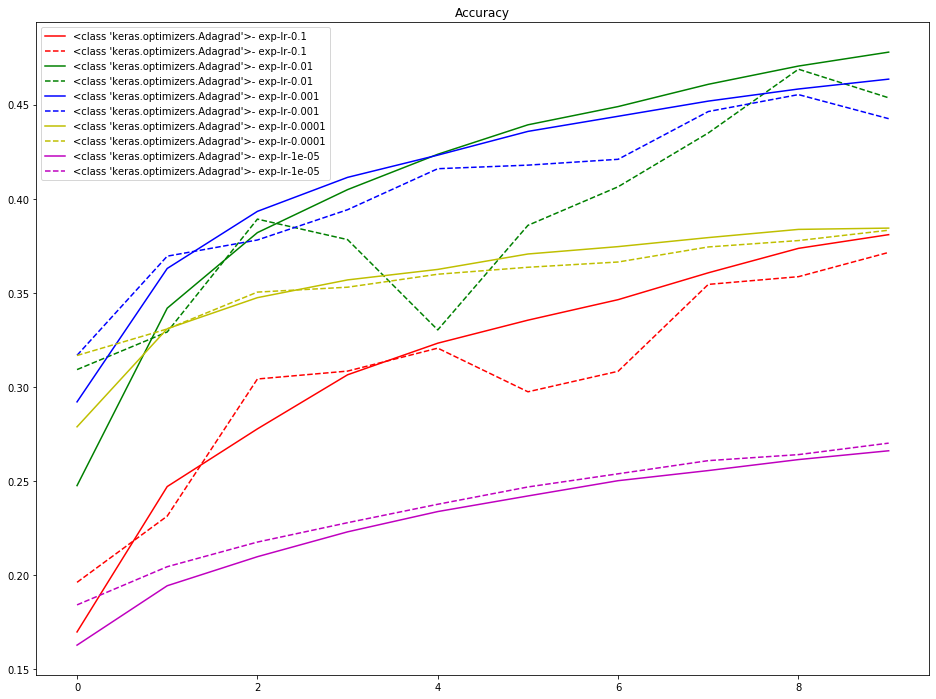

Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [===========

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 3s 55us/step - loss: 1.8913 - accuracy: 0.3252 - val_loss: 1.7526 - val_accuracy: 0.3852
Epoch 2/10
50000/50000 [==============================] - 3s 53us/step - loss: 1.7099 - accuracy: 0.3965 - val_loss: 1.6604 - val_accuracy: 0.4147
Epoch 3/10
50000/50000 [==============================] - 3s 52us/step - loss: 1.6286 - accuracy: 0.4245 - val_loss: 1.6106 - val_accuracy: 0.4290
Epoch 4/10
50000/50000 [==============================] - 3s 50us/step - loss: 1.5780 - accuracy: 0.4424 - val_loss: 1.5767 - val_accuracy: 0.4380
Epoch 5/10
50000/50000 [==============================] - 3s 51us/step - loss: 1.5310 - accuracy: 0.4596 - val_loss: 1.5517 - val_accuracy: 0.4513
Epoch 6/10
50000/50000 [==============================] - 3s 50us/step - loss: 1.4939 - accuracy: 0.4735 - val_loss: 1.5262 - val_accuracy: 0.4549
Epoch 7/10
50000/50000 [==============================] - 2s 50us/st

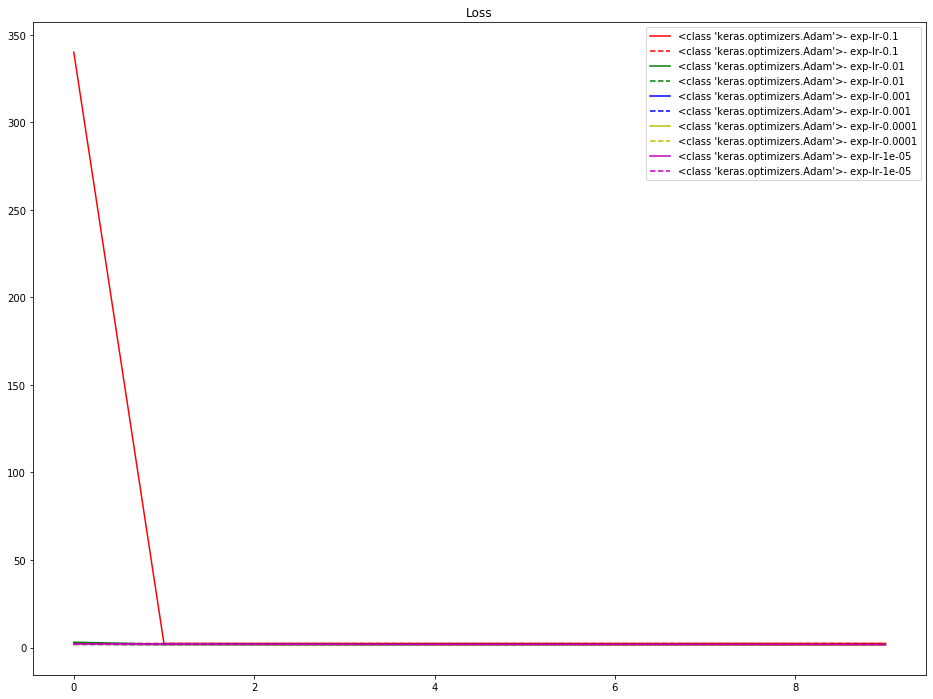

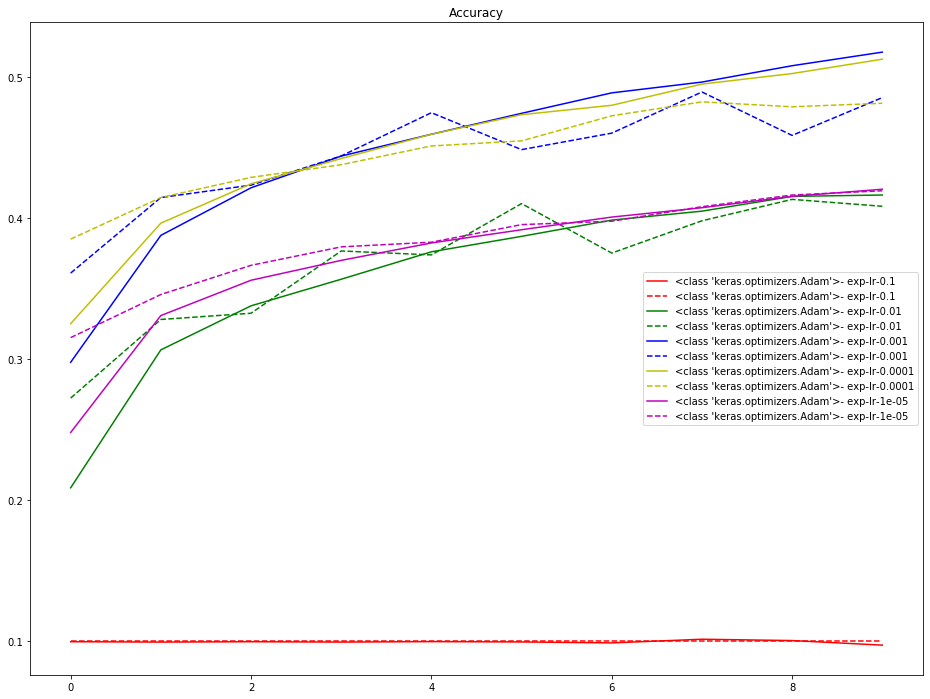

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

color_bar = ["r", "g", "b", "y", "m", "k","c","r", "g", "b", "y", "m", "k","c","r", "g", "b", "y", "m", "k"]
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for optimizers in opt:
    results = {}
    if optimizers == 'SGD':
        optimizers = SGD(lr=LEARN_START, momentum=MOMENTUM) 
    for lr in LEARNING_RATE:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with LR = %.6f" % (lr))
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        #optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizers(lr=lr))

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["accuracy"]
        valid_acc = model.history.history["val_accuracy"]

        exp_name_tag = "{0}- exp-lr-{1}".format(str(optimizers),str(lr))
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}
        
    plt.figure(figsize=(16,12))
        
    for i, cond in enumerate(results.keys()):
        plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
        plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
    plt.title("Loss")
    plt.legend()
    plt.show()

    plt.figure(figsize=(16,12))
    for i, cond in enumerate(results.keys()):
        plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
        plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
    plt.title("Accuracy")
    plt.legend()
    plt.show()

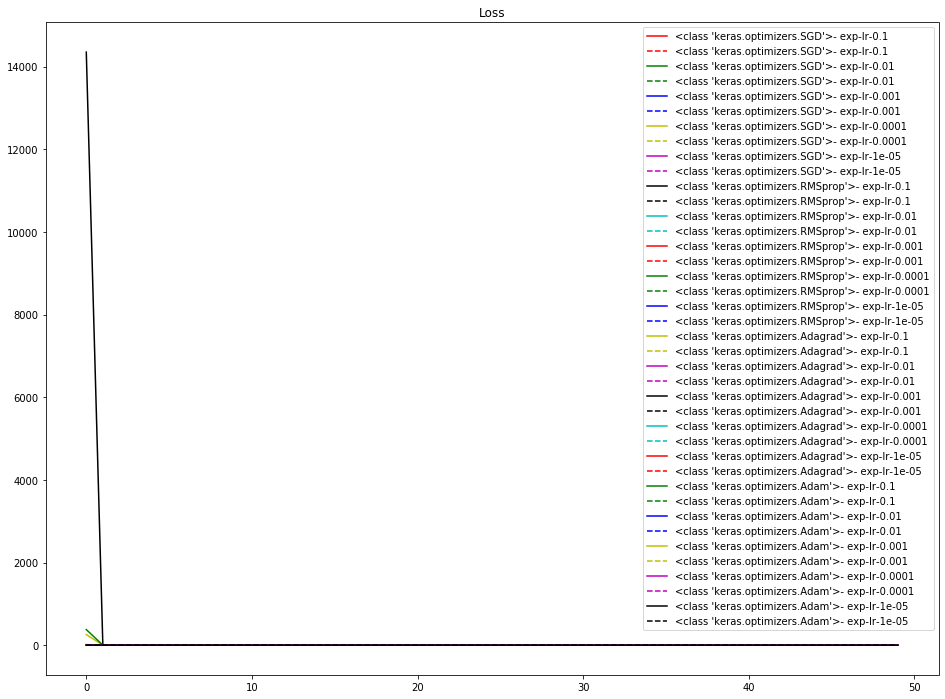

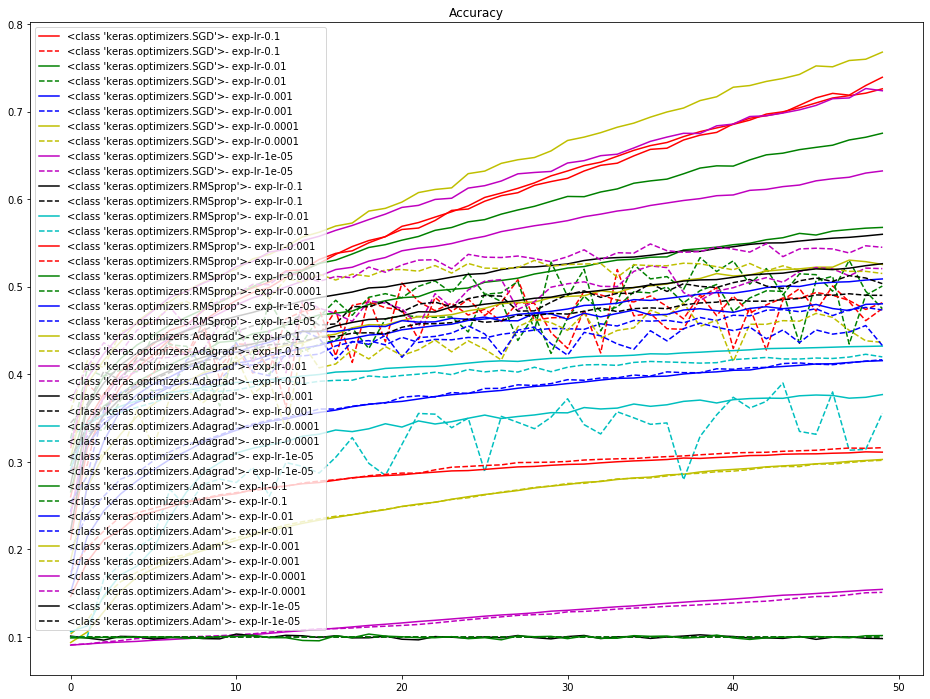

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(16,12))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(16,12))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()